# P-Values

- StatQuest Videos:
    - https://youtu.be/vemZtEM63GY
    - https://youtu.be/JQc3yx0-Q9E

At its heart, a **p-value is a measure of surprise**. It answers the question: "If there were actually nothing interesting going on (e.g., this coin is fair, this drug has no effect), how surprising is the data I just collected?" A small p-value means "very surprising," leading you to think your "nothing interesting" assumption might be wrong.

Hypothesis testing is the formal process where the p-value is used.

*   **Null Hypothesis (H₀):** The skeptical "nothing is happening" assumption. *Example from video:* "Even though I got 4 heads and 1 tail, my coin is no different from a normal, fair coin."
*   **Alternative Hypothesis (H₁):** The claim you're trying to find evidence for. *Example:* "My coin is special/biased."
*   **Significance Level (α):** The threshold for "surprise," usually set at **0.05**.
*   **The Verdict:** If p-value ≤ α, you reject the Null Hypothesis. If p-value > α, you fail to reject it.

## Calculating p-values

A p-value is not just one number; it's the **sum of the probabilities of all results that are *at least as extreme* as what you observed**.

This is broken down into 3 parts. Let's use the example of **flipping a coin 5 times and getting 4 Heads and 1 Tail**. Our Null Hypothesis is that the coin is fair.

A p-value is composed of three parts:

**1. The probability of your observation.**
   *   There are 32 possible outcomes when flipping a coin 5 times (HHHHH, HHHHT, etc.).
   *   There are 5 ways to get 4 heads and 1 tail (HHHHT, HHHTH, HHTHH, HTHHH, THHHH).
   *   So, the probability is **5 / 32**.
        * We consider all 5 combinations because we do not care about the order of the events, as all 5 events are independant and do not influence subsequent events.

**2. The probability of observing something else that is equally rare (or equally extreme).**
   *   What's just as rare as getting 4 heads? Getting 4 tails!
   *   There are 5 ways to get 1 head and 4 tails (TTTTH, TTTHT, etc.).
   *   So, the probability of this equally rare event is also **5 / 32**.

**3. The probability of observing something rarer or more extreme.**
   *   What's rarer than getting 4 heads? Getting 5 heads! The probability is **1 / 32**.
   *   What else is rarer? Getting 5 tails! The probability is **1 / 32**.
   *   So, the total probability of something more extreme is (1/32 + 1/32) = **2 / 32**.

**Now, you add them all up:**

P-value = (Prob. of your result) + (Prob. of equally rare results) + (Prob. of rarer results)

P-value = $(5/32) + (5/32) + (2/32) = 12 / 32 = 0.375$

**Conclusion:** Our p-value is 0.375. This is much larger than our alpha of 0.05. Therefore, getting 4 heads in 5 flips is *not surprising enough* to convince us the coin is special. 

- We **fail to reject the Null Hypothesis**.

In [3]:
n_flips = 5
n_heads_observed = 4
n_tails_observed = 1
prob_heads = 0.5 # Null hypothesis: a fair coin

In [4]:
import math

def binomial_probability(n, k, p):
    """ Calculates the probability of getting exactly 'k' successes in 'n' trials.

    Args:
        n: number of trials (e.g., 5 flips)
        k: number of successes (e.g., 4 heads)
        p: probability of success on a single trial (e.g., 0.5 for heads)
    """
    # C(n, k) - the number of ways to choose k successes from n trials
    combinations = math.comb(n, k)
    # The probability of that specific sequence
    probability_of_sequence = (p**k) * ((1-p)**(n-k))
    return combinations * probability_of_sequence

In [ ]:
# 1. Probability of our observation (4 Heads, 1 Tail)
prob_4_heads = binomial_probability(n_flips, 4, prob_heads)
print(f"Probability of getting exactly 4 heads: {prob_4_heads:.4f}") # 5/32

Probability of getting exactly 4 heads: 0.1562


In [ ]:
# 2. Probability of equally rare events
# Getting 4 tails (which means 1 head) is equally rare for a fair coin.
prob_1_head = binomial_probability(n_flips, 1, prob_heads)
print(f"Probability of getting exactly 1 head (equally rare): {prob_1_head:.4f}") # 5/32

Probability of getting exactly 1 head (equally rare): 0.1562


In [ ]:
# 3. Probability of rarer (more extreme) events
# What's rarer than 4 heads? 5 heads.
prob_5_heads = binomial_probability(n_flips, 5, prob_heads)

# What's rarer than 1 head? 0 heads (i.e., 5 tails).
prob_0_heads = binomial_probability(n_flips, 0, prob_heads)

prob_rarer_events = prob_5_heads + prob_0_heads
print(f"Probability of getting 5 heads: {prob_5_heads:.4f}") # 1/32
print(f"Probability of getting 0 heads: {prob_0_heads:.4f}") # 1/32
print(f"Total probability of rarer events: {prob_rarer_events:.4f}") # 2/32

Probability of getting 5 heads: 0.0312
Probability of getting 0 heads: 0.0312
Total probability of rarer events: 0.0625


In [ ]:
# --- Calculate the final p-value by summing the parts ---
p_value_coin = prob_4_heads + prob_1_head + prob_rarer_events

print(f"The calculated p-value is: {p_value_coin:.4f}") # 12/32

The calculated p-value is: 0.3750


#### Outcome:

- Since 0.3750 is greater than 0.05, we fail to reject the Null Hypothesis.
- The result is not statistically significant. 
- We don't have enough evidence to say the coin is biased.

## Calculating p-values for Continuous Data

With continuous data, we can't list every single outcome. Instead, we use a **statistical distribution** (like the bell-shaped Normal Distribution).

Here, the p-value is the **area under the curve** for values that are *at least as extreme* as our observation. "More extreme" simply means **further away from the average**.

*   **Example:** The average height of Brazilian women is 155.7 cm. We measure someone who is 142 cm tall.
*   The p-value calculation adds two areas:
    1.  The area under the curve for everyone **≤ 142 cm**.
    2.  The area under the curve for everyone who is an equal distance from the average on the *other side*. In this case, that's everyone **≥ 169.4 cm**.
*   In the video's example, this came out to **p = 0.05**. This is right on the borderline of our alpha, meaning the data is inconclusive. If we had measured someone who was 141 cm tall, the p-value would have been **0.03**, which is less than 0.05, and we would conclude that her height is "statistically significant" (i.e., unusually short for that population).

In [15]:
mean_height = 155.7
std_dev_height = 7.0
observed_height = 141

In [ ]:
# --- The Null Hypothesis ---
# H0: The woman's height comes from the blue distribution (mean=155.7, std=7).

# To calculate the area under the curve, we use a Z-score.
# The Z-score tells us how many standard deviations away from the mean our observation is.
z_score = (observed_height - mean_height) / std_dev_height
print(f"The Z-score for a height of {observed_height} cm is: {z_score:.2f}")

In [20]:
from scipy import stats

# --- Calculate the Two-Sided P-Value ---
# 1. Probability of our observation or more extreme (in the same direction)
# This is the area in the left tail of the distribution.
# We use a Cumulative Distribution Function (CDF) which gives the area to the LEFT of a point.
left_tail_area = stats.norm.cdf(z_score)
print(f"The area in the left tail (more extreme) is: {left_tail_area:.4f}")

The area in the left tail (more extreme) is: 0.0179


In [21]:
# 2. Probability of an equally extreme observation on the other side
# An equally extreme height would be the same distance *above* the mean.
right_tail_area = left_tail_area # Because the normal distribution is symmetrical

In [22]:
# 3. The p-value is the sum of the areas in both tails.
p_value_height = left_tail_area + right_tail_area

print(f"The Two-Sided p-value is: {p_value_height:.4f}")

The Two-Sided p-value is: 0.0357


#### Outcome
- Since 0.0357 is less than 0.05, we reject the Null Hypothesis.
- This is a statistically significant (unusually short) height for this population.

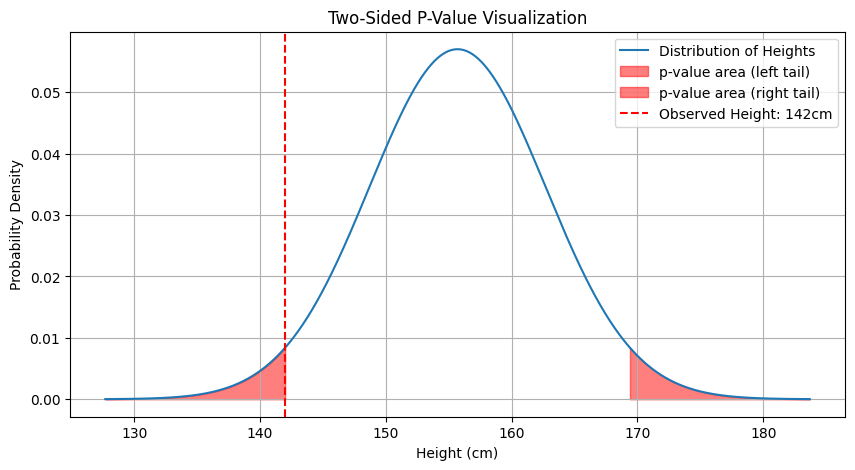

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(mean_height - 4*std_dev_height, mean_height + 4*std_dev_height, 1000)
y = stats.norm.pdf(x, mean_height, std_dev_height)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribution of Heights')
plt.fill_between(x, y, where=(x <= observed_height), color='red', alpha=0.5, label='p-value area (left tail)')
plt.fill_between(x, y, where=(x >= mean_height + (mean_height - observed_height)), color='red', alpha=0.5, label='p-value area (right tail)')
plt.axvline(observed_height, color='red', linestyle='--', label=f'Observed Height: {observed_height}cm')
plt.title('Two-Sided P-Value Visualization')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()